__Kunskapskontroll 3 - Analys av en datafil__

__Steg 1:__ 
Ett analysverktyg för att läsa in, analysera och selektera data ur en dataframe eller Excel-tabell 

Efter lektionen i fredags insåg jag att man kan tolka uppgiften som ett utredningsuppdrag snarare än en programmeringsuppgift.
Jag funderade då på att revidera min lösning från grunden, men bestämde mig för att utveckla steg ett till ett generellt verktyg för att analtýsera och "städa" i datatabeller. Ett verktyg som jag tror att jag kan ha nytta av senare i kursen för att snabbt få ett grepp om tabellers data och datakvalitet.

=== Data Cleaner Tool ===



Enter the path to your data file (or [Enter] for 'housing.csv'):  


2025-06-08 10:37:36,811 - INFO - Successfully loaded data from housing.csv



=== Main Menu ===
1. Show data summary
2. Validate data
3. Handle duplicate rows
4. Handle missing values
5. Handle outliers
6. Select (and reorder) columns
7. Transform data
8. Visualize data
9. Show change history
10. Save data
11. Exit



Enter your choice (1-11):  1



=== Data Summary ===

Shape: (20640, 10)

Column Statistics:
                        Min           Mean       Max     Type  Missing values  \
longitude           -124.35    -119.569704   -114.31  float64               0   
latitude              32.54      35.631861     41.95  float64               0   
housing_median_age      1.0      28.639486      52.0  float64               0   
total_rooms             2.0    2635.763081   39320.0  float64               0   
total_bedrooms          1.0     537.870553    6445.0  float64             207   
population              3.0    1425.476744   35682.0  float64               0   
households              1.0      499.53968    6082.0  float64               0   
median_income        0.4999       3.870671   15.0001  float64               0   
median_house_value  14999.0  206855.816909  500001.0  float64               0   
ocean_proximity         N/A            N/A       N/A   object               0   

                    Unique values  Duplicate R


Press Enter to continue... 



=== Main Menu ===
1. Show data summary
2. Validate data
3. Handle duplicate rows
4. Handle missing values
5. Handle outliers
6. Select (and reorder) columns
7. Transform data
8. Visualize data
9. Show change history
10. Save data
11. Exit



Enter your choice (1-11):  2

 Specify outlier percentage (0-100) [default is 25] :  



=== Data Validation Issues ===
- Found 207 missing values
- Found 1287 outliers in total_rooms
- Found 1271 outliers in total_bedrooms
- Found 1196 outliers in population
- Found 1220 outliers in households
- Found 681 outliers in median_income
- Found 1071 outliers in median_house_value



Press Enter to continue... 



=== Main Menu ===
1. Show data summary
2. Validate data
3. Handle duplicate rows
4. Handle missing values
5. Handle outliers
6. Select (and reorder) columns
7. Transform data
8. Visualize data
9. Show change history
10. Save data
11. Exit



Enter your choice (1-11):  3



No duplicate rows found.



Press Enter to continue... 



=== Main Menu ===
1. Show data summary
2. Validate data
3. Handle duplicate rows
4. Handle missing values
5. Handle outliers
6. Select (and reorder) columns
7. Transform data
8. Visualize data
9. Show change history
10. Save data
11. Exit



Enter your choice (1-11):  4



Missing values per column:
total_bedrooms    207
dtype: int64

Options for handling missing values:
1. Remove rows with any missing values
2. Fill missing values with column mean (numeric) or mode (categorical)
3. Fill missing values with a specific value
4. Skip



Enter your choice (1-4):  2



Filled missing values with mean/mode.



Press Enter to continue... 



=== Main Menu ===
1. Show data summary
2. Validate data
3. Handle duplicate rows
4. Handle missing values
5. Handle outliers
6. Select (and reorder) columns
7. Transform data
8. Visualize data
9. Show change history
10. Save data
11. Exit



Enter your choice (1-11):  5

 Specify outlier percentage (0-100) [default is 25] :  



Available outlier handling methods:
1. Remove outliers (delete rows)
2. Cap outliers (set to min/max threshold)
3. Winsorize (replace with percentile values)
4. Show outlier statistics



Enter method (1-4):  3



Available columns:
1. longitude
2. latitude
3. housing_median_age
4. total_rooms
5. total_bedrooms
6. population
7. households
8. median_income
9. median_house_value



Enter column numbers to process (comma-separated) or 'all':  all



No outliers found in longitude

No outliers found in latitude

No outliers found in housing_median_age

Winsorized 1287 outliers in total_rooms

Winsorized 1306 outliers in total_bedrooms

Winsorized 1196 outliers in population

Winsorized 1220 outliers in households

Winsorized 681 outliers in median_income

Winsorized 1071 outliers in median_house_value



Press Enter to continue... 



=== Main Menu ===
1. Show data summary
2. Validate data
3. Handle duplicate rows
4. Handle missing values
5. Handle outliers
6. Select (and reorder) columns
7. Transform data
8. Visualize data
9. Show change history
10. Save data
11. Exit



Enter your choice (1-11):  6



Current columns:
1. longitude
2. latitude
3. housing_median_age
4. total_rooms
5. total_bedrooms
6. population
7. households
8. median_income
9. median_house_value
10. ocean_proximity



Enter and reorder column numbers to keep (comma-separated) or [Enter] to keep all in current order:  1,2,3,6,7,8,9,10



Columns updated.



Press Enter to continue... 



=== Main Menu ===
1. Show data summary
2. Validate data
3. Handle duplicate rows
4. Handle missing values
5. Handle outliers
6. Select (and reorder) columns
7. Transform data
8. Visualize data
9. Show change history
10. Save data
11. Exit



Enter your choice (1-11):  7



Transformation Options:
1. Convert data types
2. Scale numeric columns
3. Encode categorical variables
4. Create new features
5. Return to main menu



Enter your choice (1-5):  5



=== Main Menu ===
1. Show data summary
2. Validate data
3. Handle duplicate rows
4. Handle missing values
5. Handle outliers
6. Select (and reorder) columns
7. Transform data
8. Visualize data
9. Show change history
10. Save data
11. Exit



Enter your choice (1-11):  8



Visualization Options:
1. Distribution plot for numeric columns
2. Correlation heatmap
3. Box plots for numeric columns
4. Count plots for categorical columns
5. Scatter plot matrix
6. Return to main menu



Enter your choice (1-6):  1


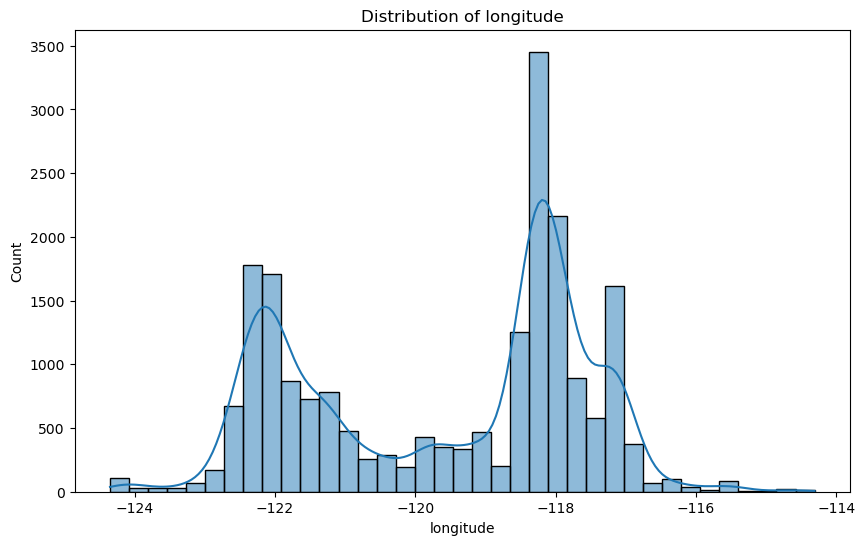

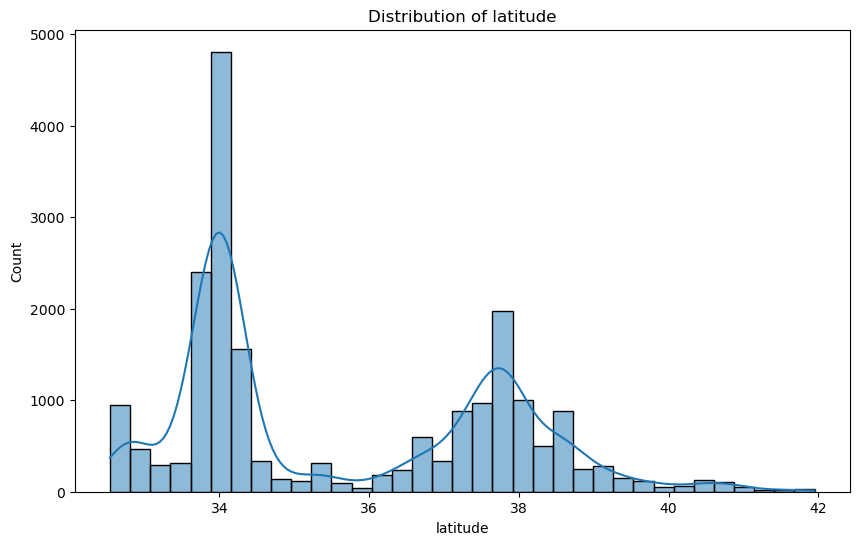

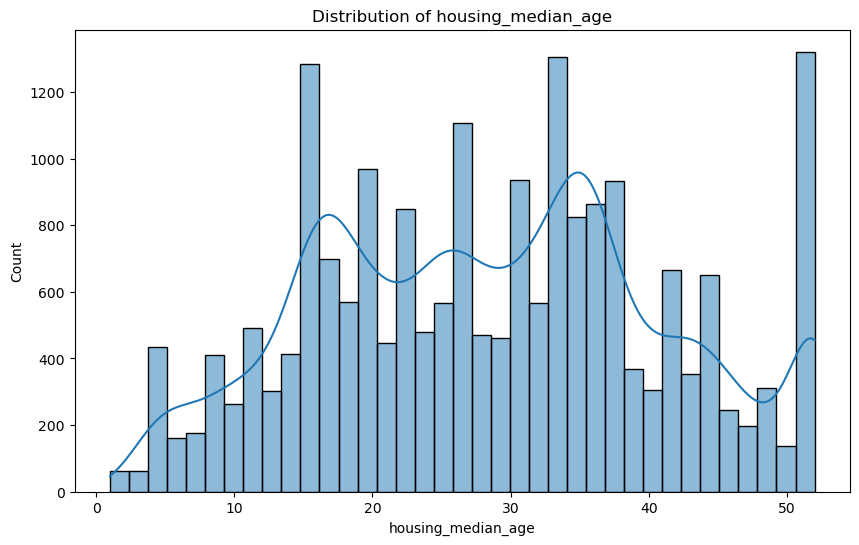

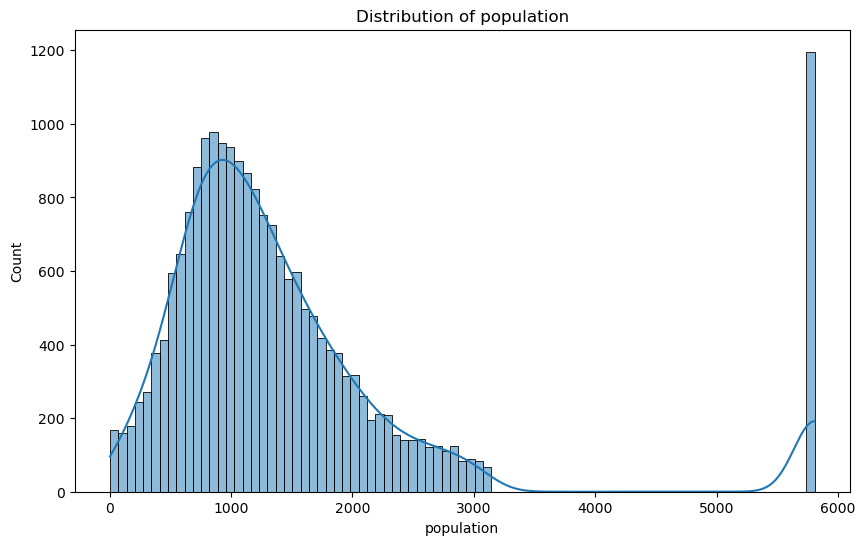

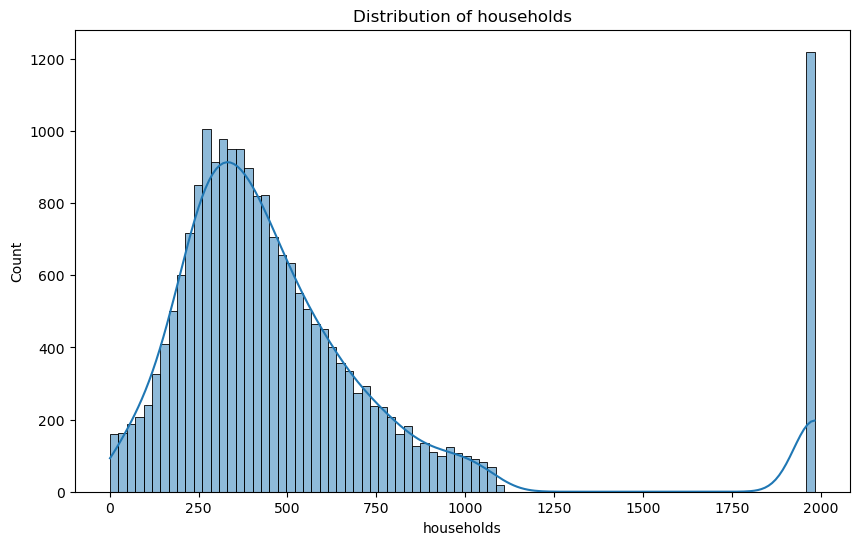

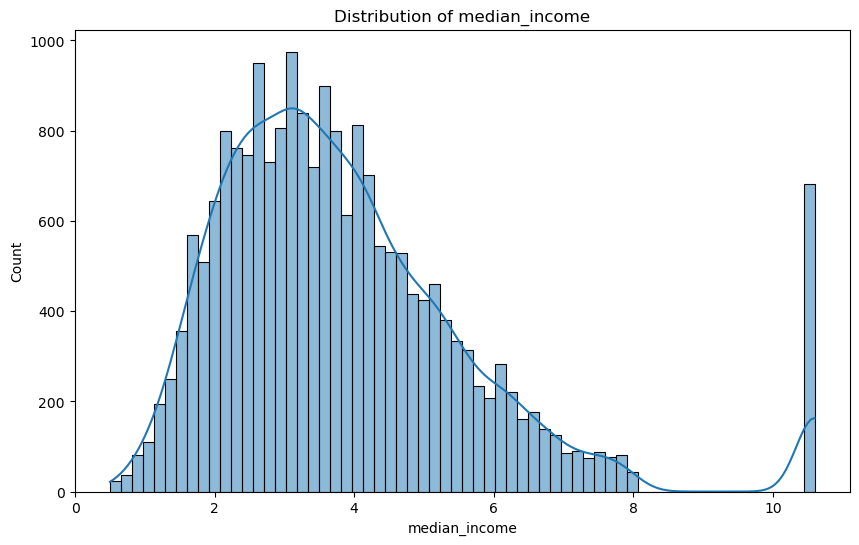

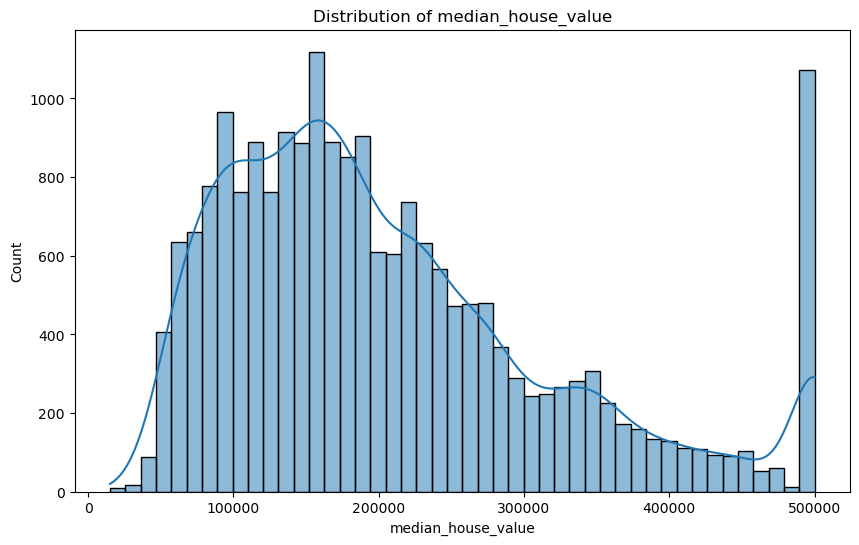


Visualization Options:
1. Distribution plot for numeric columns
2. Correlation heatmap
3. Box plots for numeric columns
4. Count plots for categorical columns
5. Scatter plot matrix
6. Return to main menu



Enter your choice (1-6):  6



=== Main Menu ===
1. Show data summary
2. Validate data
3. Handle duplicate rows
4. Handle missing values
5. Handle outliers
6. Select (and reorder) columns
7. Transform data
8. Visualize data
9. Show change history
10. Save data
11. Exit



Enter your choice (1-11):  9



=== Change History ===

Time: 2025-06-08 10:37:36.812115
Action: Initial data load
Data shape: (20640, 10)

Time: 2025-06-08 10:38:59.097306
Action: Winsorized 1287 outliers in total_rooms
Data shape: (20640, 10)

Time: 2025-06-08 10:38:59.100910
Action: Winsorized 1306 outliers in total_bedrooms
Data shape: (20640, 10)

Time: 2025-06-08 10:38:59.103930
Action: Winsorized 1196 outliers in population
Data shape: (20640, 10)

Time: 2025-06-08 10:38:59.105935
Action: Winsorized 1220 outliers in households
Data shape: (20640, 10)

Time: 2025-06-08 10:38:59.108957
Action: Winsorized 681 outliers in median_income
Data shape: (20640, 10)

Time: 2025-06-08 10:38:59.110992
Action: Winsorized 1071 outliers in median_house_value
Data shape: (20640, 10)

=== Main Menu ===
1. Show data summary
2. Validate data
3. Handle duplicate rows
4. Handle missing values
5. Handle outliers
6. Select (and reorder) columns
7. Transform data
8. Visualize data
9. Show change history
10. Save data
11. Exit



Enter your choice (1-11):  10



Save options:
1. CSV
2. Excel
3. Both
4. Cancel



Enter your choice (1-4):  3

Enter base filename (without extension) or [Enter] for 'edited_data':  



Saved to edited_data.csv

Saved to edited_data.xlsx



Press Enter to continue... 11



=== Main Menu ===
1. Show data summary
2. Validate data
3. Handle duplicate rows
4. Handle missing values
5. Handle outliers
6. Select (and reorder) columns
7. Transform data
8. Visualize data
9. Show change history
10. Save data
11. Exit



Enter your choice (1-11):  11

You have unsaved changes. Save before exiting? (y/n):  n



Exiting...


In [2]:
"""
Data Cleaner Tool

A comprehensive tool for cleaning and analyzing data tables. Features include:
- Data inspection and summary statistics
- Handling of duplicate rows
- Handling of missing values
- Data type conversion
- Column selection and reordering
- Data export in multiple formats
- Data visualization
- Data transformation
- Data validation
"""

import pandas as pd
import numpy as np
from pathlib import Path
import sys
from typing import Optional, List, Dict, Any
import logging
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

class DataCleaner:
    def __init__(self, file_path: str):
        """Initialize the DataCleaner with a data file.
        
        Args:
            file_path (str): Path to the input data file
        """
        self.file_path = Path(file_path)
        self.original_df = None
        self.working_df = None
        self.history = []  # Track changes
        self.setup_logging()
        self.load_data()
        
    def setup_logging(self):
        """Set up logging configuration."""
        logging.basicConfig(
            level=logging.INFO,
            format='%(asctime)s - %(levelname)s - %(message)s'
        )
        self.logger = logging.getLogger(__name__)
        
    def load_data(self):
        """Load data from file with error handling."""
        try:
            self.original_df = pd.read_csv(self.file_path)
            self.working_df = self.original_df.copy()
            self.logger.info(f"Successfully loaded data from {self.file_path}")
            self.add_to_history("Initial data load")
        except Exception as e:
            self.logger.error(f"Error loading data: {str(e)}")
            sys.exit(1)
            
    def add_to_history(self, action: str):
        """Add an action to the history."""
        self.history.append({
            'timestamp': datetime.now(),
            'action': action,
            'shape': self.working_df.shape
        })
            
    def show_data_summary(self):
        """Display summary information about the dataset."""
        print("\n=== Data Summary ===")
        print(f"\nShape: {self.working_df.shape}")
        
        # Create summary DataFrame
        stats = {
            'Min': [],
            'Mean': [],
            'Max': [],
            'Type': [],
            'Missing values': [],
            'Unique values': [],
            'Duplicate Rows': []
        }
        
        for col in self.working_df.columns:
            stats['Type'].append(str(self.working_df[col].dtype))
            stats['Missing values'].append(self.working_df[col].isnull().sum())
            stats['Unique values'].append(self.working_df[col].nunique())
            stats['Duplicate Rows'].append(self.working_df[col].duplicated().sum())
            
            if self.working_df[col].dtype in ['int64', 'float64']:
                stats['Min'].append(self.working_df[col].min())
                stats['Mean'].append(self.working_df[col].mean())
                stats['Max'].append(self.working_df[col].max())
            else:
                stats['Min'].append('N/A')
                stats['Mean'].append('N/A')
                stats['Max'].append('N/A')
        
        summary_df = pd.DataFrame(stats, index=self.working_df.columns)
        print("\nColumn Statistics:")
        print(summary_df)
        input("\nPress Enter to continue...")
        os.system("cls")
        
    def visualize_data(self):
        """Create visualizations for the data."""
        while True:
            print("\nVisualization Options:")
            print("1. Distribution plot for numeric columns")
            print("2. Correlation heatmap")
            print("3. Box plots for numeric columns")
            print("4. Count plots for categorical columns")
            print("5. Scatter plot matrix")
            print("6. Return to main menu")
            
            choice = input("\nEnter your choice (1-6): ")
            
            if choice == '1':
                self._plot_distributions()
            elif choice == '2':
                self._plot_correlation_heatmap()
            elif choice == '3':
                self._plot_boxplots()
            elif choice == '4':
                self._plot_categorical_counts()
            elif choice == '5':
                self._plot_scatter_matrix()
            elif choice == '6':
                break
            else:
                print("Invalid choice. Please try again.")
                
    def _plot_distributions(self):
        """Plot distributions of numeric columns."""
        numeric_cols = self.working_df.select_dtypes(include=['int64', 'float64']).columns
        if len(numeric_cols) == 0:
            print("No numeric columns found.")
            return
            
        for col in numeric_cols:
            plt.figure(figsize=(10, 6))
            sns.histplot(data=self.working_df, x=col, kde=True)
            plt.title(f'Distribution of {col}')
            plt.show()
            
    def _plot_correlation_heatmap(self):
        """Plot correlation heatmap for numeric columns."""
        numeric_df = self.working_df.select_dtypes(include=['int64', 'float64'])
        if numeric_df.empty:
            print("No numeric columns found for correlation.")
            return
            
        plt.figure(figsize=(12, 8))
        sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
        plt.title('Correlation Heatmap')
        plt.show()
        
    def _plot_scatter_matrix(self):
        """Create a scatter plot matrix for numeric columns."""
        numeric_df = self.working_df.select_dtypes(include=['int64', 'float64'])
        if numeric_df.empty:
            print("No numeric columns found for scatter matrix.")
            return
            
        if len(numeric_df.columns) > 5:
            print("\nWarning: Creating scatter matrix for more than 5 columns may be slow.")
            proceed = input("Do you want to proceed? (y/n): ").lower()
            if proceed != 'y':
                return
                
        plt.figure(figsize=(12, 8))
        sns.pairplot(numeric_df)
        plt.suptitle('Scatter Plot Matrix', y=1.02)
        plt.show()

    def _plot_boxplots(self):
        """Plot box plots for numeric columns in a single figure."""
        numeric_cols = self.working_df.select_dtypes(include=['int64', 'float64']).columns
        if len(numeric_cols) == 0:
            print("No numeric columns found.")
            return

        # Calculate the number of rows and columns for subplots
        n_cols = len(numeric_cols)
        n_rows = (n_cols + 2) // 3  # 3 plots per row, round up
        
        # Create a figure with subplots
        fig, axes = plt.subplots(n_rows, min(3, n_cols), figsize=(15, 4*n_rows))
        axes = axes.flatten()  # Flatten the axes array for easier indexing
        
        # Plot each boxplot in its own subplot
        for idx, col in enumerate(numeric_cols):
            sns.boxplot(x=self.working_df[col], ax=axes[idx])
            axes[idx].set_title(f'Boxplot of {col}')
            axes[idx].set_xlabel(col)
        
        # Hide any unused subplots
        for idx in range(len(numeric_cols), len(axes)):
            axes[idx].set_visible(False)
        
        # Adjust layout to prevent overlap
        plt.tight_layout()
        plt.show()

    def _plot_categorical_counts(self):
        """Plot count plots for categorical columns."""
        categorical_cols = self.working_df.select_dtypes(include=['object', 'category']).columns
        if len(categorical_cols) == 0:
            print("No categorical columns found.")
            return

        for col in categorical_cols:
            plt.figure(figsize=(10, 4))
            sns.countplot(x=self.working_df[col])
            plt.title(f'Count Plot of {col}')
            plt.xlabel(col)
            plt.xticks(rotation=45)
            plt.show()

    def transform_data(self):
        """Transform the data using various methods."""
        while True:
            print("\nTransformation Options:")
            print("1. Convert data types")
            print("2. Scale numeric columns")
            print("3. Encode categorical variables")
            print("4. Create new features")
            print("5. Return to main menu")
            
            choice = input("\nEnter your choice (1-5): ")
            
            if choice == '1':
                self._convert_data_types()
            elif choice == '2':
                self._scale_numeric_columns()
            elif choice == '3':
                self._encode_categorical()
            elif choice == '4':
                self._create_features()
            elif choice == '5':
                break
            else:
                print("Invalid choice. Please try again.")
                
    def _convert_data_types(self):
        """Convert data types of columns."""
        print("\nCurrent data types:")
        print(self.working_df.dtypes)
        
        while True:
            col = input("\nEnter column name to convert (or 'done' to finish): ")
            if col.lower() == 'done':
                break
                
            if col not in self.working_df.columns:
                print("Column not found.")
                continue
                
            print("\nAvailable types:")
            print("1. int64")
            print("2. float64")
            print("3. str")
            print("4. datetime")
            
            type_choice = input("Enter type number: ")
            
            try:
                if type_choice == '1':
                    self.working_df[col] = self.working_df[col].astype('int64')
                elif type_choice == '2':
                    self.working_df[col] = self.working_df[col].astype('float64')
                elif type_choice == '3':
                    self.working_df[col] = self.working_df[col].astype('str')
                elif type_choice == '4':
                    self.working_df[col] = pd.to_datetime(self.working_df[col])
                else:
                    print("Invalid type choice.")
                    continue
                    
                print(f"Converted {col} to new type.")
                self.add_to_history(f"Converted {col} data type")
            except Exception as e:
                print(f"Error converting type: {str(e)}")
                
    def _scale_numeric_columns(self):
        """Scale numeric columns using various methods."""
        numeric_cols = self.working_df.select_dtypes(include=['int64', 'float64']).columns
        if len(numeric_cols) == 0:
            print("No numeric columns found.")
            return
            
        print("\nAvailable scaling methods:")
        print("1. Min-Max scaling (0 to 1)")
        print("2. Standard scaling (mean=0, std=1)")
        print("3. Robust scaling (handles outliers)")
        
        method = input("\nEnter scaling method (1-3): ")
        
        if method not in ['1', '2', '3']:
            print("Invalid method choice.")
            return
            
        print("\nAvailable columns:")
        for i, col in enumerate(numeric_cols, 1):
            print(f"{i}. {col}")
            
        cols_to_scale = input("\nEnter column numbers to scale (comma-separated) or 'all': ").strip()
        
        if cols_to_scale.lower() == 'all':
            cols_to_scale = numeric_cols
        else:
            try:
                indices = [int(x.strip()) - 1 for x in cols_to_scale.split(',')]
                cols_to_scale = [numeric_cols[i] for i in indices]
            except (ValueError, IndexError):
                print("Invalid column selection.")
                return
                
        try:
            if method == '1':
                for col in cols_to_scale:
                    min_val = self.working_df[col].min()
                    max_val = self.working_df[col].max()
                    self.working_df[col] = (self.working_df[col] - min_val) / (max_val - min_val)
                print("\nApplied Min-Max scaling.")
                
            elif method == '2':
                for col in cols_to_scale:
                    mean = self.working_df[col].mean()
                    std = self.working_df[col].std()
                    self.working_df[col] = (self.working_df[col] - mean) / std
                print("\nApplied Standard scaling.")
                
            elif method == '3':
                for col in cols_to_scale:
                    Q1 = self.working_df[col].quantile(0.25)
                    Q3 = self.working_df[col].quantile(0.75)
                    IQR = Q3 - Q1
                    self.working_df[col] = (self.working_df[col] - Q1) / IQR
                print("\nApplied Robust scaling.")
                
            self.add_to_history(f"Scaled columns: {', '.join(cols_to_scale)}")
            
        except Exception as e:
            print(f"\nError during scaling: {str(e)}")
            
    def _encode_categorical(self):
        """Encode categorical variables using various methods."""
        categorical_cols = self.working_df.select_dtypes(include=['object', 'category']).columns
        if len(categorical_cols) == 0:
            print("No categorical columns found.")
            return
            
        print("\nAvailable encoding methods:")
        print("1. One-hot encoding")
        print("2. Label encoding")
        print("3. Ordinal encoding")
        
        method = input("\nEnter encoding method (1-3): ")
        
        if method not in ['1', '2', '3']:
            print("Invalid method choice.")
            return
            
        print("\nAvailable columns:")
        for i, col in enumerate(categorical_cols, 1):
            print(f"{i}. {col}")
            
        cols_to_encode = input("\nEnter column numbers to encode (comma-separated) or 'all': ").strip()
        
        if cols_to_encode.lower() == 'all':
            cols_to_encode = categorical_cols
        else:
            try:
                indices = [int(x.strip()) - 1 for x in cols_to_encode.split(',')]
                cols_to_encode = [categorical_cols[i] for i in indices]
            except (ValueError, IndexError):
                print("Invalid column selection.")
                return
                
        try:
            if method == '1':
                # One-hot encoding
                encoded_df = pd.get_dummies(self.working_df[cols_to_encode], prefix=cols_to_encode)
                self.working_df = pd.concat([self.working_df.drop(cols_to_encode, axis=1), encoded_df], axis=1)
                print("\nApplied One-hot encoding.")
                
            elif method == '2':
                # Label encoding
                for col in cols_to_encode:
                    self.working_df[col] = pd.Categorical(self.working_df[col]).codes
                print("\nApplied Label encoding.")
                
            elif method == '3':
                # Ordinal encoding
                for col in cols_to_encode:
                    unique_values = self.working_df[col].unique()
                    value_map = {val: i for i, val in enumerate(sorted(unique_values))}
                    self.working_df[col] = self.working_df[col].map(value_map)
                print("\nApplied Ordinal encoding.")
                
            self.add_to_history(f"Encoded columns: {', '.join(cols_to_encode)}")
            
        except Exception as e:
            print(f"\nError during encoding: {str(e)}")
            
    def _create_features(self):
        """Create new features from existing columns."""
        print("\nAvailable feature creation methods:")
        print("1. Create interaction terms")
        print("2. Create polynomial features")
        print("3. Create date/time features")
        print("4. Create text features")
        
        method = input("\nEnter feature creation method (1-4): ")
        
        if method not in ['1', '2', '3', '4']:
            print("Invalid method choice.")
            return
            
        try:
            if method == '1':
                # Create interaction terms
                numeric_cols = self.working_df.select_dtypes(include=['int64', 'float64']).columns
                if len(numeric_cols) < 2:
                    print("Need at least 2 numeric columns for interactions.")
                    return
                    
                print("\nAvailable columns:")
                for i, col in enumerate(numeric_cols, 1):
                    print(f"{i}. {col}")
                    
                cols = input("\nEnter two column numbers for interaction (comma-separated): ").strip()
                try:
                    idx1, idx2 = [int(x.strip()) - 1 for x in cols.split(',')]
                    col1, col2 = numeric_cols[idx1], numeric_cols[idx2]
                    self.working_df[f'{col1}_x_{col2}'] = self.working_df[col1] * self.working_df[col2]
                    print(f"\nCreated interaction term: {col1}_x_{col2}")
                    self.add_to_history(f"Created interaction term: {col1}_x_{col2}")
                except (ValueError, IndexError):
                    print("Invalid column selection.")
                    
            elif method == '2':
                # Create polynomial features
                numeric_cols = self.working_df.select_dtypes(include=['int64', 'float64']).columns
                if len(numeric_cols) == 0:
                    print("No numeric columns found.")
                    return
                    
                print("\nAvailable columns:")
                for i, col in enumerate(numeric_cols, 1):
                    print(f"{i}. {col}")
                    
                col = input("\nEnter column number for polynomial features: ").strip()
                degree = input("Enter polynomial degree (2-3): ").strip()
                
                try:
                    idx = int(col) - 1
                    degree = int(degree)
                    if not 2 <= degree <= 3:
                        raise ValueError
                        
                    col_name = numeric_cols[idx]
                    for d in range(2, degree + 1):
                        self.working_df[f'{col_name}^{d}'] = self.working_df[col_name] ** d
                    print(f"\nCreated polynomial features up to degree {degree}")
                    self.add_to_history(f"Created polynomial features for {col_name}")
                except (ValueError, IndexError):
                    print("Invalid input.")
                    
            elif method == '3':
                # Create date/time features
                date_cols = []
                for col in self.working_df.columns:
                    try:
                        pd.to_datetime(self.working_df[col])
                        date_cols.append(col)
                    except:
                        continue
                        
                if not date_cols:
                    print("No date columns found.")
                    return
                    
                print("\nAvailable date columns:")
                for i, col in enumerate(date_cols, 1):
                    print(f"{i}. {col}")
                    
                col = input("\nEnter date column number: ").strip()
                try:
                    idx = int(col) - 1
                    col_name = date_cols[idx]
                    date_series = pd.to_datetime(self.working_df[col_name])
                    
                    self.working_df[f'{col_name}_year'] = date_series.dt.year
                    self.working_df[f'{col_name}_month'] = date_series.dt.month
                    self.working_df[f'{col_name}_day'] = date_series.dt.day
                    self.working_df[f'{col_name}_dayofweek'] = date_series.dt.dayofweek
                    
                    print(f"\nCreated date features for {col_name}")
                    self.add_to_history(f"Created date features for {col_name}")
                except (ValueError, IndexError):
                    print("Invalid input.")
                    
            elif method == '4':
                # Create text features
                text_cols = self.working_df.select_dtypes(include=['object']).columns
                if len(text_cols) == 0:
                    print("No text columns found.")
                    return
                    
                print("\nAvailable text columns:")
                for i, col in enumerate(text_cols, 1):
                    print(f"{i}. {col}")
                    
                col = input("\nEnter text column number: ").strip()
                try:
                    idx = int(col) - 1
                    col_name = text_cols[idx]
                    
                    self.working_df[f'{col_name}_length'] = self.working_df[col_name].str.len()
                    self.working_df[f'{col_name}_word_count'] = self.working_df[col_name].str.split().str.len()
                    
                    print(f"\nCreated text features for {col_name}")
                    self.add_to_history(f"Created text features for {col_name}")
                except (ValueError, IndexError):
                    print("Invalid input.")
                    
        except Exception as e:
            print(f"\nError during feature creation: {str(e)}")
            
    def show_history(self):
        """Display the history of changes made to the data."""
        if not self.history:
            print("\nNo changes recorded.")
            return
            
        print("\n=== Change History ===")
        for entry in self.history:
            print(f"\nTime: {entry['timestamp']}")
            print(f"Action: {entry['action']}")
            print(f"Data shape: {entry['shape']}")
            
    def validate_data(self):
        """Validate data for common issues."""
        shave = input("\n Specify outlier percentage (0-100) [default is 25] : ") or 25
        try:
            shave = int(shave)
            if shave < 0 or shave > 100:
                raise ValueError
        except ValueError:
            print("Invalid input. Using default value of 25.")
        issues = []
        
        # Check for missing values
        missing = self.working_df.isnull().sum()
        if missing.sum() > 0:
            issues.append(f"Found {missing.sum()} missing values")
            
        # Check for duplicates
        duplicates = self.working_df.duplicated().sum()
        if duplicates > 0:
            issues.append(f"Found {duplicates} duplicate rows")
            
        # Check for infinite values
        inf_count = np.isinf(self.working_df.select_dtypes(include=['float64'])).sum().sum()
        if inf_count > 0:
            issues.append(f"Found {inf_count} infinite values")
            
        # Check for outliers in numeric columns
        numeric_cols = self.working_df.select_dtypes(include=['int64', 'float64']).columns
        for col in numeric_cols:
            Q1 = self.working_df[col].quantile(shave/100)
            Q3 = self.working_df[col].quantile(1-shave/100)
            IQR = Q3 - Q1
            outliers = ((self.working_df[col] < (Q1 - 1.5 * IQR)) | 
                       (self.working_df[col] > (Q3 + 1.5 * IQR))).sum()
            if outliers > 0:
                issues.append(f"Found {outliers} outliers in {col}")
                
        if issues:
            print("\n=== Data Validation Issues ===")
            for issue in issues:
                print(f"- {issue}")
                
            input("\nPress Enter to continue...")
            return

        else:
            print("\nNo data validation issues found.")
            input("\nPress Enter to continue...")
            os.system("cls")


    def handle_duplicates(self) -> None:
        """Handle duplicate rows in the dataset."""
        duplicates = self.working_df[self.working_df.duplicated()]
        if duplicates.empty:
            print("\nNo duplicate rows found.")
            input("\nPress Enter to continue...")
            os.system("cls")
            return
            
        print(f"\nFound {len(duplicates)} duplicate rows:")
        print(duplicates)
        input("\nPress Enter to continue...")
        os.system("cls")

        while True:
            choice = input("\nDo you want to remove duplicate rows? (y/n): ").lower()
            if choice in ['y', 'n']:
                break
            print("Invalid input. Please enter 'y' or 'n'.")
            
        if choice == 'y':
            original_len = len(self.working_df)
            self.working_df = self.working_df.drop_duplicates()
            removed = original_len - len(self.working_df)
            print(f"\nRemoved {removed} duplicate rows.")
        input("\nPress Enter to continue...")
        os.system("cls")

    def handle_missing_values(self) -> None:
        """Handle missing values in the dataset."""
        missing = self.working_df.isnull().sum()
        if missing.sum() == 0:
            print("\nNo missing values found.")
            return
            
        print("\nMissing values per column:")
        print(missing[missing > 0])
        
        while True:
            print("\nOptions for handling missing values:")
            print("1. Remove rows with any missing values")
            print("2. Fill missing values with column mean (numeric) or mode (categorical)")
            print("3. Fill missing values with a specific value")
            print("4. Skip")
            
            choice = input("\nEnter your choice (1-4): ")
            
            if choice == '1':
                original_len = len(self.working_df)
                self.working_df = self.working_df.dropna()
                removed = original_len - len(self.working_df)
                print(f"\nRemoved {removed} rows with missing values.")
                break
                
            elif choice == '2':
                for col in self.working_df.columns:
                    if self.working_df[col].dtype in ['int64', 'float64']:
                        self.working_df[col] = self.working_df[col].fillna(self.working_df[col].mean())
                    else:
                        self.working_df[col] = self.working_df[col].fillna(self.working_df[col].mode()[0])
                print("\nFilled missing values with mean/mode.")
                break
                
            elif choice == '3':
                value = input("\nEnter the value to fill missing values with: ")
                self.working_df = self.working_df.fillna(value)
                print("\nFilled missing values with specified value.")
                break
                
            elif choice == '4':
                print("\nSkipping missing value handling.")
                break
                
            else:
                print("Invalid choice. Please try again.")
        input("\nPress Enter to continue...")
        os.system("cls")

    def select_columns(self) -> None:
        """Select and reorder columns."""
        print("\nCurrent columns:")
        for i, col in enumerate(self.working_df.columns, 1):
            print(f"{i}. {col}")
            
        while True:
            choice = input("\nEnter and reorder column numbers to keep (comma-separated) or [Enter] to keep all in current order: ") or 'all'
            
            if choice.lower() == 'all':
                break
                
            try:
                indices = [int(x.strip()) - 1 for x in choice.split(',')]
                if all(0 <= i < len(self.working_df.columns) for i in indices):
                    self.working_df = self.working_df.iloc[:, indices]
                    print("\nColumns updated.")
                    break
                else:
                    print("Invalid column numbers. Please try again.")
            except ValueError:
                print("Invalid input. Please enter numbers separated by commas.")
        input("\nPress Enter to continue...")
        os.system("cls")

    def save_data(self) -> None:
        """Save the processed data to a file."""
        if self.working_df.equals(self.original_df):
            print("\nNo changes made to the data.")
            return
            
        while True:
            print("\nSave options:")
            print("1. CSV")
            print("2. Excel")
            print("3. Both")
            print("4. Cancel")
            
            choice = input("\nEnter your choice (1-4): ")
            
            if choice in ['1', '2', '3']:
                base_name = input("\nEnter base filename (without extension) or [Enter] for 'edited_data': ") or 'edited_data'
                
                try:
                    if choice in ['1', '3']:
                        self.working_df.to_csv(f"{base_name}.csv", index=False)
                        print(f"\nSaved to {base_name}.csv")
                        
                    if choice in ['2', '3']:
                        self.working_df.to_excel(f"{base_name}.xlsx", index=False)
                        print(f"\nSaved to {base_name}.xlsx")
                        
                    break
                except Exception as e:
                    print(f"\nError saving file: {str(e)}")
                    
            elif choice == '4':
                print("\nSave cancelled.")
                break
                
            else:
                print("Invalid choice. Please try again.")
        input("\nPress Enter to continue...")
        os.system("cls")

    def handle_outliers(self):
        """Handle outliers in numeric columns using various methods."""
        shave = input("\n Specify outlier percentage (0-100) [default is 25] : ") or 25
        try:
            shave = int(shave)
            if shave < 0 or shave > 100:
                raise ValueError
        except ValueError:
            print("Invalid input. Using default value of 0%.")
            shave = 0.001

        if shave == 0:
            shave = 0.001

        issues = []
        numeric_cols = self.working_df.select_dtypes(include=['int64', 'float64']).columns
        if len(numeric_cols) == 0:
            print("No numeric columns found.")
            return

        print("\nAvailable outlier handling methods:")
        print("1. Remove outliers (delete rows)")
        print("2. Cap outliers (set to min/max threshold)")
        print("3. Winsorize (replace with percentile values)")
        print("4. Show outlier statistics")
        
        method = input("\nEnter method (1-4): ")
        
        if method not in ['1', '2', '3', '4']:
            print("Invalid method choice.")
            return

        print("\nAvailable columns:")
        for i, col in enumerate(numeric_cols, 1):
            print(f"{i}. {col}")
            
        cols_to_process = input("\nEnter column numbers to process (comma-separated) or 'all': ").strip()
        
        if cols_to_process.lower() == 'all':
            cols_to_process = numeric_cols
        else:
            try:
                indices = [int(x.strip()) - 1 for x in cols_to_process.split(',')]
                cols_to_process = [numeric_cols[i] for i in indices]
            except (ValueError, IndexError):
                print("Invalid column selection.")
                return

        # Calculate outlier thresholds using IQR method
        for col in cols_to_process:
            Q1 = self.working_df[col].quantile(shave/100)
            Q3 = self.working_df[col].quantile(1-shave/100)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = ((self.working_df[col] < lower_bound) | 
                       (self.working_df[col] > upper_bound))
            n_outliers = outliers.sum()
            
            if method == '1':  # Remove outliers
                if n_outliers > 0:
                    original_len = len(self.working_df)
                    self.working_df = self.working_df[~outliers]
                    removed = original_len - len(self.working_df)
                    print(f"\nRemoved {removed} outliers from {col}")
                    self.add_to_history(f"Removed {removed} outliers from {col}")
                else:
                    print(f"\nNo outliers found in {col}")
                    
            elif method == '2':  # Cap outliers
                if n_outliers > 0:
                    self.working_df.loc[outliers & (self.working_df[col] < lower_bound), col] = lower_bound
                    self.working_df.loc[outliers & (self.working_df[col] > upper_bound), col] = upper_bound
                    print(f"\nCapped {n_outliers} outliers in {col}")
                    self.add_to_history(f"Capped {n_outliers} outliers in {col}")
                else:
                    print(f"\nNo outliers found in {col}")
                    
            elif method == '3':  # Winsorize
                if n_outliers > 0:
                    # Replace outliers with 1st and 99th percentiles
                    lower_percentile = self.working_df[col].quantile(0.01)
                    upper_percentile = self.working_df[col].quantile(0.99)
                    self.working_df.loc[outliers & (self.working_df[col] < lower_bound), col] = lower_percentile
                    self.working_df.loc[outliers & (self.working_df[col] > upper_bound), col] = upper_percentile
                    print(f"\nWinsorized {n_outliers} outliers in {col}")
                    self.add_to_history(f"Winsorized {n_outliers} outliers in {col}")
                else:
                    print(f"\nNo outliers found in {col}")
                    
            elif method == '4':  # Show statistics
                print(f"\nOutlier statistics for {col}:")
                print(f"Number of outliers: {n_outliers}")
                print(f"Lower bound: {lower_bound:.2f}")
                print(f"Upper bound: {upper_bound:.2f}")
                print(f"Minimum value: {self.working_df[col].min():.2f}")
                print(f"Maximum value: {self.working_df[col].max():.2f}")
                print(f"Mean value: {self.working_df[col].mean():.2f}")
                print(f"Median value: {self.working_df[col].median():.2f}")
                
                # Show boxplot
                plt.figure(figsize=(10, 4))
                sns.boxplot(x=self.working_df[col])
                plt.title(f'Boxplot of {col} (showing outliers)')
                plt.show()
        
        input("\nPress Enter to continue...")
        os.system("cls")

def main():
    """Main function to run the data cleaner."""
    print("=== Data Cleaner Tool ===")
    
    # Get input file
    while True:
        file_path = input("\nEnter the path to your data file (or [Enter] for 'housing.csv'): ").strip() or 'housing.csv'

            
        if Path(file_path).exists():
            break
        print(f"File not found: {file_path}")
        
    # Initialize data cleaner
    cleaner = DataCleaner(file_path)
    
    # Main menu loop
    while True:
        #os.system("cls")
        print("\n=== Main Menu ===")
        print("1. Show data summary")
        print("2. Validate data")
        print("3. Handle duplicate rows")
        print("4. Handle missing values")
        print("5. Handle outliers")
        print("6. Select (and reorder) columns")
        print("7. Transform data")
        print("8. Visualize data")
        print("9. Show change history")
        print("10. Save data")
        print("11. Exit")
        
        choice = input("\nEnter your choice (1-11): ")
        
        if choice == '1':
            cleaner.show_data_summary()
        elif choice == '2':
            cleaner.validate_data()
        elif choice == '3':
            cleaner.handle_duplicates()
        elif choice == '4':
            cleaner.handle_missing_values()
        elif choice == '5':
            cleaner.handle_outliers()
        elif choice == '6':
            cleaner.select_columns()
        elif choice == '7':
            cleaner.transform_data()
        elif choice == '8':
            cleaner.visualize_data()
        elif choice == '9':
            cleaner.show_history()
        elif choice == '10':
            cleaner.save_data()
        elif choice == '11':
            if not cleaner.working_df.equals(cleaner.original_df):
                save = input("\nYou have unsaved changes. Save before exiting? (y/n): ").lower()
                if save == 'y':
                    cleaner.save_data()
            print("\nExiting...")
            break
        else:
            print("Invalid choice. Please try again.")

if __name__ == "__main__":
    main()



In [4]:
""" Interactive housing map

This tool allows you to filter the housing data by age, income, house value, population, and proximity to the ocean.
Interactive sliders and a drop-down selector allow you to adjust the filters and see the results immediately.
"""

import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from pathlib import Path
from IPython.display import display, clear_output

# *** Select original or edited data ***
file_sel = input("Select original (o) or edited data (e) or [Enter] to specify a file path/name: ")

if file_sel == "o" or file_sel == "original":
    df = pd.read_csv('housing.csv')
elif file_sel == "e" or file_sel[0:3] == "edit":
    df = pd.read_csv('edited_data.csv')
else:
    while True:
        file_path = input("\nEnter the path and name of your data file").strip()
        if Path(file_path).exists():
            break
        print(f"File not found: {file_path}")    
    df = pd.read_csv(file_path)

# *** Load data *** 
df = pd.read_csv('housing.csv')

# *** Set slider limits *** 
max_age = df['housing_median_age'].max()
max_income = df['median_income'].max()
max_house_value = df['median_house_value'].max()
min_house_value = df['median_house_value'].min()
max_population = df['population'].max()
min_population = df['population'].min()

#  *** Widget setup of limits and initial values *** 
age_slider = widgets.IntSlider(value=max_age, min=1, max=max_age, step=1, description='House median mge')
income_slider = widgets.FloatSlider(value=0.0, min=0.0, max=max_income, step=0.1, description='Income')
value_slider = widgets.IntSlider(value=min_house_value, min=0.0, max=max_house_value, step=1000, description=' House value')
population_slider = widgets.IntSlider(value=min_population, min=min_population, max=max_population, step=10, description='Population')
ocean_options = ['<any>'] + sorted(df['ocean_proximity'].unique())
proximity_dropdown = widgets.Dropdown(options=ocean_options, description='Proximity')

output = widgets.Output()

# *** Filter data from slider values  *** 
def filter_data(age, income, house_value, population, proximity):
    filtered = df[
        (df['housing_median_age'] <= age) &
        (df['median_income'] >= income) &
        (df['median_house_value'] >= house_value) &
        (df['population'] >= population)
    ]
# *** Filter data from location selector value  *** 
    if proximity != '<any>':
        filtered = filtered[filtered['ocean_proximity'] == proximity]
    return filtered

#  *** Plot data from slider values *** 
def update_plot(*args):
    with output:
        clear_output(wait=True)
        filtered = filter_data(
            age_slider.value,
            income_slider.value,
            value_slider.value,
            population_slider.value,
            proximity_dropdown.value
        )
        if filtered.empty:
            print("No data matching filter criteria.")
            return
        sizes = filtered['population'] / 100
        plt.figure(figsize=(10, 6))
        plt.scatter(
            filtered['longitude'],
            filtered['latitude'],
            c=filtered['population'],
            s=sizes,
            cmap=plt.cm.Set1,
            alpha=0.9
        )
        plt.title("Housing Map: Population by Location")
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.colorbar(label='Population')
        plt.show()

# *** Create widgets observer - "event" hooks ***
age_slider.observe(update_plot, names='value')
income_slider.observe(update_plot, names='value')
value_slider.observe(update_plot, names='value')
population_slider.observe(update_plot, names='value')
proximity_dropdown.observe(update_plot, names='value')

# *** Display UI - Plot and filters*
ui = widgets.VBox([age_slider, income_slider, value_slider, population_slider, proximity_dropdown])
display(ui, output)

# *** Initial plot ***
update_plot() 

Select original (o) or edited data (e) or [Enter] to specify a file path/name:  

Enter the path and name of your data file jkdshf


File not found: jkdshf



Enter the path and name of your data file edited_data.csv


Output()

__Självutvärdering:__
1. Vad har varit utmanande?
    - Att hitta ett kreativt angreppssätt, jag snurrade ett tag på kolumnerna med rum och sovrum men fann att de var ganska ointressanta.
     Jag kom på att jag inte ville göra ett otal diagram, istället ville jag skapa en interaktiv widget med filterreglage, då blev bilden klar.
     Koden gav sig själv när målet var tydligt.
    - Att försöka hitta ett sätt att pesentera interaktivt innehåll i Jupyter var ganska utmanande, ryktesvägen sägs det att det kan gå i Jupyter Labs,
     men jag kom inte fram där heller. Möjligen skulle "plotly"-biblioteket fungera, men det kändes out of scope till denna uppgift. Sedan hittade   jag "ipywidgets" som faktiskt löste problemet.
    - Att två gånger stoppa och omvärdera min plan från grunden.
    - Vad har inte varit utmanande?
        - Jag använder "Cursor" ssom IDE och får där mycket hjälp att strukturera mina idéer och effektivisera koden, trots det blev det första scriptet nästan 1000 rader och om jag skulle leverera till kund så hade jag nog modulariserat det och gjort om  "DataCleaner" klassen till ett importerat bibliotek.
2. Jag tycker själv att dessa två script är värda en fullpoängare, de svarar på frågan, med en viss finess. Men jag är medveten om att jag är en
   "Good enough" programmerare så det finns naturigtvis punkter i dessa som man kan kritisera. Jag har testat alla funktioner, men kanske inte i alla kombinationer.
3. Kursens bredd hittills är bra, vissa delar är repetition för mig, men delar av matten och matriser som ekvationer är helt nytt för mig.